In [1]:
#IMPORTING LIBRARIES.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('laptop_data.csv')

In [3]:
data12=data.copy()

In [4]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
data.shape

(1303, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
#checking for duplicates
data.duplicated().sum()

0

In [8]:
# checking for missing  values
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
#dropping unnecesary columns.
data.drop(columns='Unnamed: 0', inplace=True)

In [10]:
#cleaning ram and weight column.
data['Ram']=data['Ram'].str.replace('GB','')
data['Weight']=data['Weight'].str.replace('kg','')

In [11]:
#changing datatype for Ram and weight column.
data['Ram']=data['Ram'].astype(int)
data['Weight']=data['Weight'].astype(float)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


In [13]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sati7\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


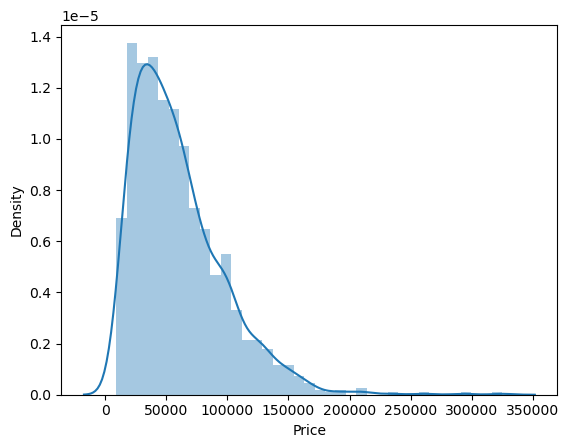

In [14]:
#CHECKING DISTRIBUTION OF PRICE COLUMN.
sns.distplot(data['Price'])
plt.show()

C:\Users\sati7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


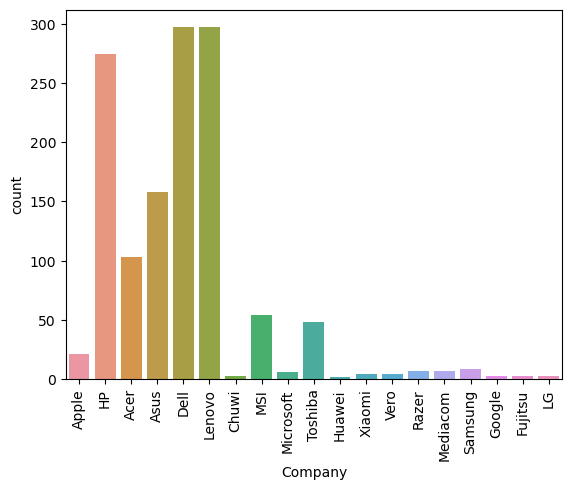

In [15]:
#CHECKING POPULARITY OF BRANDS.
sns.countplot(data['Company'])
plt.xticks(rotation=90)
plt.show()

C:\Users\sati7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


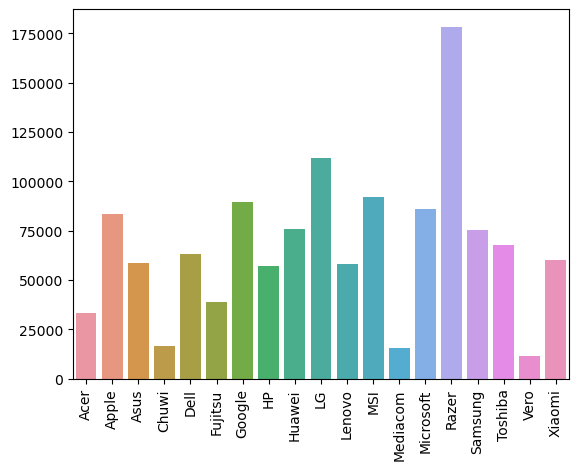

In [17]:
#CHECKING FOR AVERAGE PRICE OF EACH BRAND LAPTOPS.
brands=data.groupby('Company')['Price'].mean().keys().to_list()
price=data.groupby('Company')['Price'].mean().to_list() 

sns.barplot(brands, price)
plt.xticks(rotation=90)
plt.show()

C:\Users\sati7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


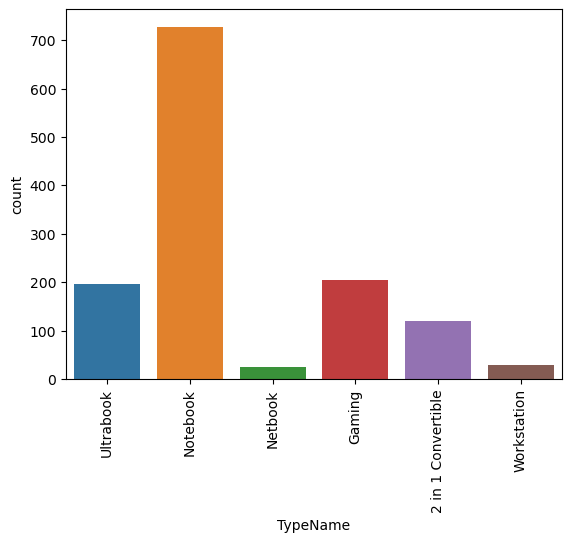

In [18]:
#CHECKING POPULRITY BY TYPES
sns.countplot(data['TypeName'])
plt.xticks(rotation=90)
plt.show()

C:\Users\sati7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


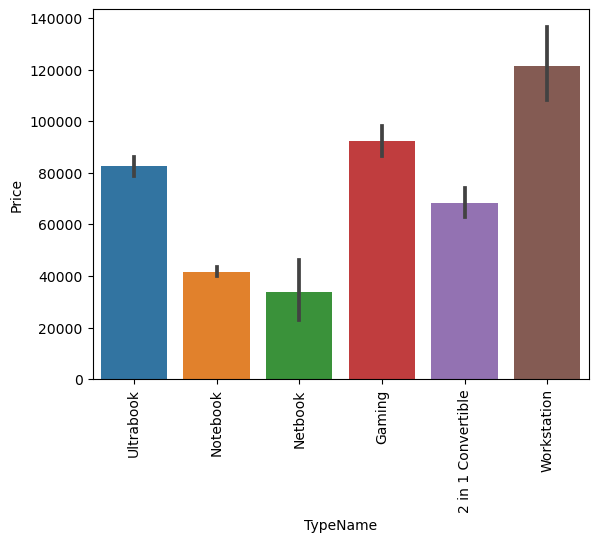

In [19]:
#COMPARING COST OF TYPES OF LAPTOP
sns.barplot(data['TypeName'], data['Price'])
plt.xticks(rotation=90)
plt.show()

C:\Users\sati7\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


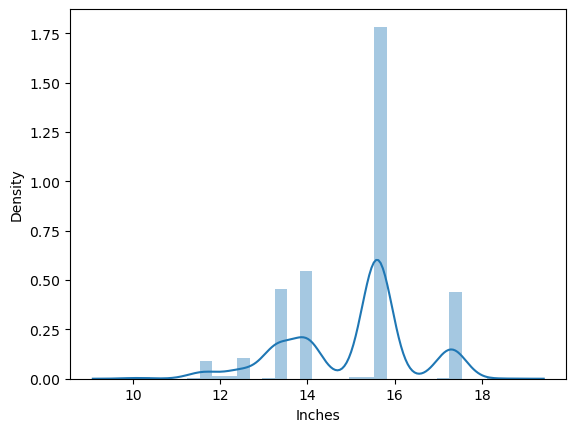

In [20]:
# CHECKING DISTRIBUTION OF INCHES COLUMNS.
sns.distplot(data['Inches'])
plt.show()

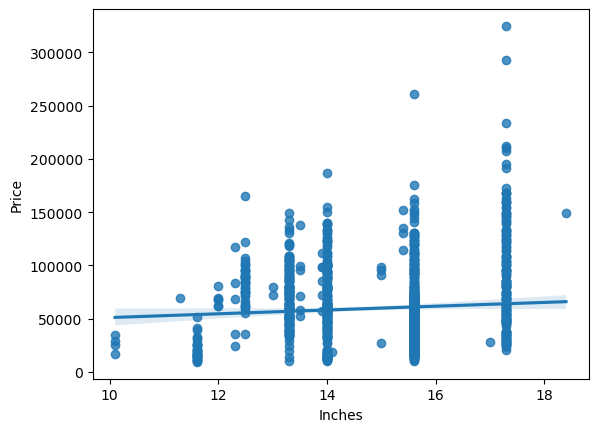

In [21]:
sns.regplot(x='Inches',y='Price',data=data)
plt.show()

In [22]:
#TOUCH-SCREEN

In [23]:
data['TouchScreen']=data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [24]:
data['TouchScreen'].value_counts()

0    1111
1     192
Name: TouchScreen, dtype: int64

In [25]:
data['ScreenResolution1']=data['ScreenResolution'].apply(lambda x: x.split()[-1])

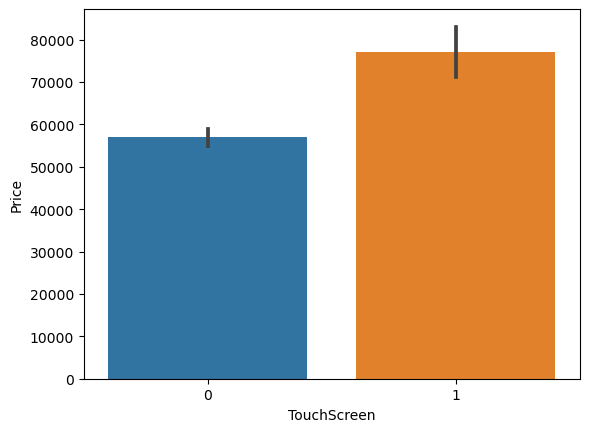

In [26]:
sns.barplot(x=data['TouchScreen'],y=data['Price'])
plt.show()

In [27]:
#IPS DISPLAY

In [28]:
data['IPS_Panel']=data['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

C:\Users\sati7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


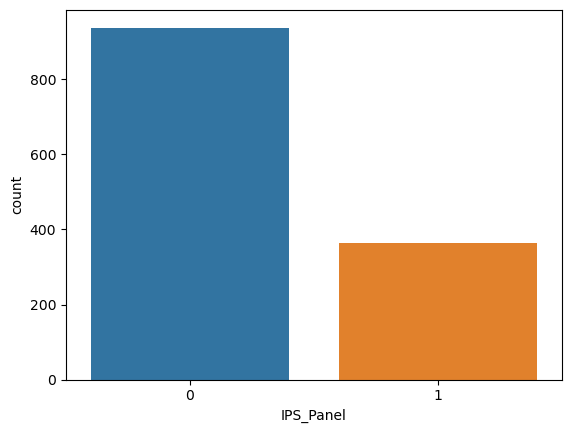

In [29]:
sns.countplot(data['IPS_Panel'])
plt.show()

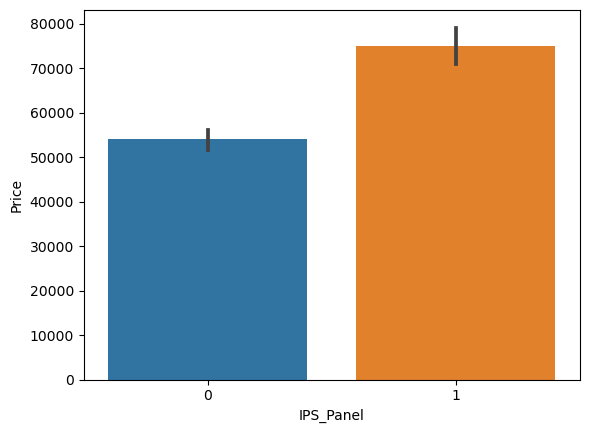

In [30]:
sns.barplot(x=data['IPS_Panel'],y=data['Price'])
plt.show()

In [ ]:
data.head()

In [31]:
#checking for corelation of different columns with price.

In [32]:
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS_Panel      0.252208
Name: Price, dtype: float64

In [37]:
#separating Xresolution and Yresolution to calulate PPI

In [38]:
data['X_res']= data['ScreenResolution1'].apply(lambda x: x.split('x')[0])

In [39]:
data['Y_res']= data['ScreenResolution1'].apply(lambda x: x.split('x')[1])

In [40]:
data['X_res']= data['X_res'].astype(int)
data['Y_res']= data['Y_res'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   ScreenResolution   1303 non-null   object 
 4   Cpu                1303 non-null   object 
 5   Ram                1303 non-null   int32  
 6   Memory             1303 non-null   object 
 7   Gpu                1303 non-null   object 
 8   OpSys              1303 non-null   object 
 9   Weight             1303 non-null   float64
 10  Price              1303 non-null   float64
 11  TouchScreen        1303 non-null   int64  
 12  ScreenResolution1  1303 non-null   object 
 13  IPS_Panel          1303 non-null   int64  
 14  X_res              1303 non-null   int32  
 15  Y_res              1303 non-null   int32  
dtypes: float64(3), int32(3),

In [41]:
#forming PPI column using X_res, Y_res and Inches

data['PPI'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')

In [42]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,ScreenResolution1,IPS_Panel,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560x1600,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440x900,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920x1080,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880x1800,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560x1600,1,2560,1600,226.983005


In [43]:
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS_Panel      0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [44]:
#Dropping unnecessary columns.
data.drop(columns=['ScreenResolution','ScreenResolution1','Inches', 'X_res','Y_res'], inplace=True)

In [45]:
#cpu column

data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [46]:
data['Cpu Name']=data['Cpu'].apply(lambda x:' '.join(x.split(' ')[:3]) )

In [47]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS_Panel,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [48]:
#reducing cardinality of CPU column
def fetch_text(text):
    if text =='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if( text.split()[0]=='Intel'):
            return 'Other Intel preocessors'
        else:
            return 'AMD Processor'
    

In [49]:
data['Cpu Brand']=data['Cpu Name'].apply(fetch_text)

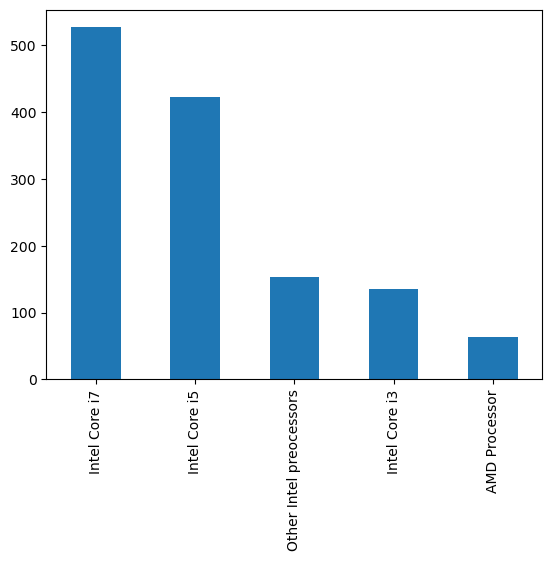

In [50]:
data['Cpu Brand'].value_counts().plot(kind='bar')
plt.show()

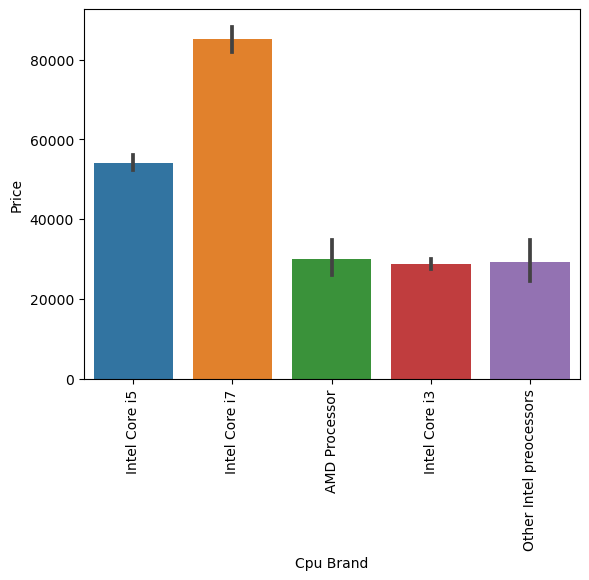

In [51]:
sns.barplot(x=data['Cpu Brand'], y=data['Price'])
plt.xticks(rotation= 90)
plt.show()


In [52]:
#DROPPING UNNECESSARY COLUMNS.
data.drop(columns=['Cpu','Cpu Name'], inplace=True)


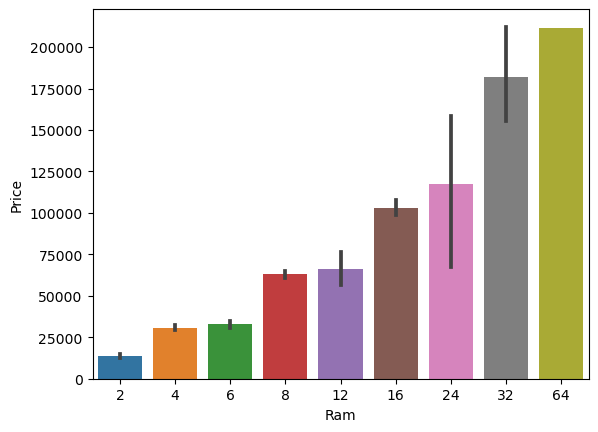

In [53]:
sns.barplot(x=data['Ram'], y=data['Price'])
plt.show()

In [54]:
#MEMORY COLUMNS.
#separating different types of memories.

In [55]:
data["Memory"] = data["Memory"].str.replace('TB', '000')

In [56]:
data['Memory']=data['Memory'].str.replace('GB','')

In [57]:
new= data['Memory'].str.split('+',expand=True)

In [58]:
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [59]:
data['first']=new[0]
data['second']=new[1]

In [60]:
data["first"]=data["first"].str.strip() 

#By applying strip() to sentence,
#the resulting string trimmed_sentence is created without the leading and trailing spaces, resulting in the output 

In [61]:
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [62]:
data['first'] = data['first'].str.replace(r'\D', '')

#So, when str.replace(r'\D', '') is called, it searches for
#all non-digit characters in the string str and replaces them with an empty string, effectively removing them.

C:\Users\sati7\AppData\Local\Temp\ipykernel_928\1103286717.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D', '')


In [63]:
data["second"].fillna("0", inplace = True)

In [64]:
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [65]:
data['second'] = data['second'].str.replace(r'\D', '')

C:\Users\sati7\AppData\Local\Temp\ipykernel_928\268479233.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D', '')


In [66]:
data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

In [67]:
data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

In [68]:
#DROPPING UNNECESSARY COLUMNS.
data.drop(columns=['first', 'second','Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)

In [69]:
data.drop(columns=['Memory'],inplace=True)

In [70]:
data

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS_Panel,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel preocessors,0,0,0,64
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


In [71]:
data.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS_Panel        0.252208
PPI              0.473487
HDD             -0.093701
SSD              0.670799
Hybrid           0.008747
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [72]:
#HYBRID AND FLASH COLUMN DONT HAVE MUCH EFECT ON OUTPUT , SO WILL BE DROPPING BOTH.
data.drop(columns=['Hybrid','Flash_Storage'], inplace=True)

In [73]:
#GPU COLUMN.
data['Gpu brand']=data['Gpu'].apply(lambda x: x.split(' ')[0])

In [74]:
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [75]:
data=data[data['Gpu brand']!= 'ARM']

In [76]:
data['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

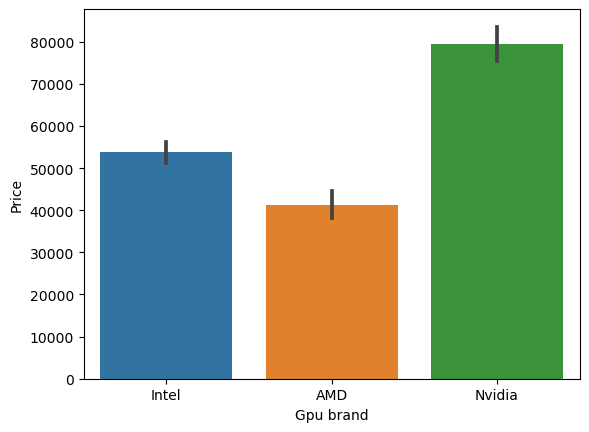

In [77]:
sns.barplot(x=data['Gpu brand'], y=data['Price'])
plt.show()

In [78]:
data.drop(columns='Gpu', inplace=True)

C:\Users\sati7\AppData\Local\Temp\ipykernel_928\2035029614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns='Gpu', inplace=True)


In [79]:
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS_Panel,PPI,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel preocessors,0,0,Intel
1301,HP,Notebook,6,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD


In [80]:
#OPERATION SYSTEM.
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [81]:
#reducing cardinality of  operating system column.
def operating(text):
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    elif text=='macOS' or text=='Mac OS X':
        return 'Mac'
    else:
        return 'Other O/S'

In [82]:
data['Operating System']=data['OpSys'].apply(operating)

C:\Users\sati7\AppData\Local\Temp\ipykernel_928\1862671143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Operating System']=data['OpSys'].apply(operating)


In [83]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS_Panel,PPI,Cpu Brand,HDD,SSD,Gpu brand,Operating System
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other O/S
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [84]:
data.drop(columns='OpSys', inplace=True)

C:\Users\sati7\AppData\Local\Temp\ipykernel_928\702272567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns='OpSys', inplace=True)


In [85]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS_Panel,PPI,Cpu Brand,HDD,SSD,Gpu brand,Operating System
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other O/S
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


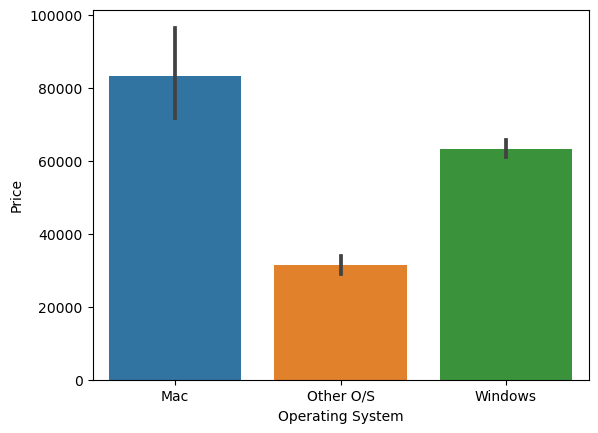

In [86]:
sns.barplot(x=data['Operating System'], y=data['Price'])
plt.show()

C:\Users\sati7\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


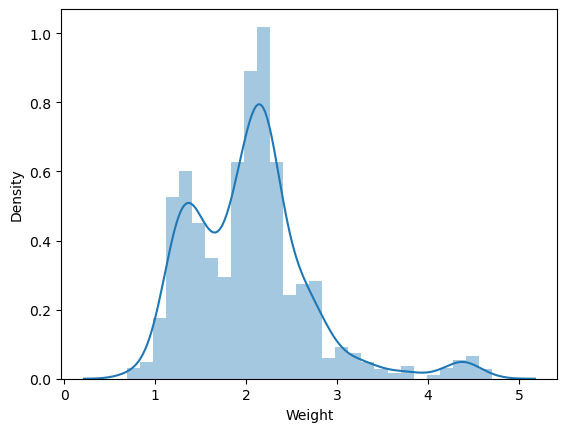

In [87]:
#WEIGHT COLUMN.
sns.distplot(data['Weight'])
plt.show()

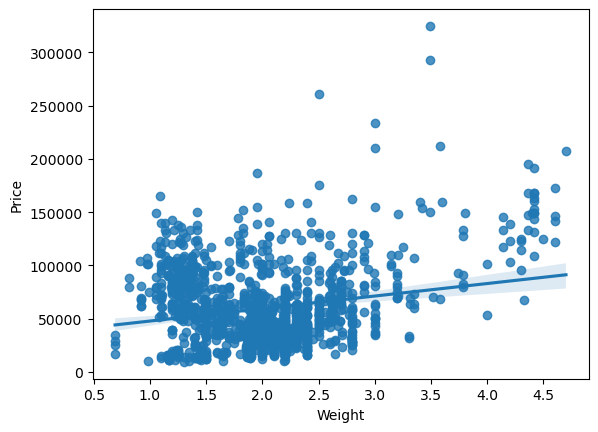

In [88]:
sns.regplot(x=data['Weight'], y=data['Price'])
plt.show()

In [89]:
data.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS_Panel      0.253320
PPI            0.475368
HDD           -0.094106
SSD            0.670660
Name: Price, dtype: float64

In [90]:
# weak Relationhsip between Price and  weight  columm.

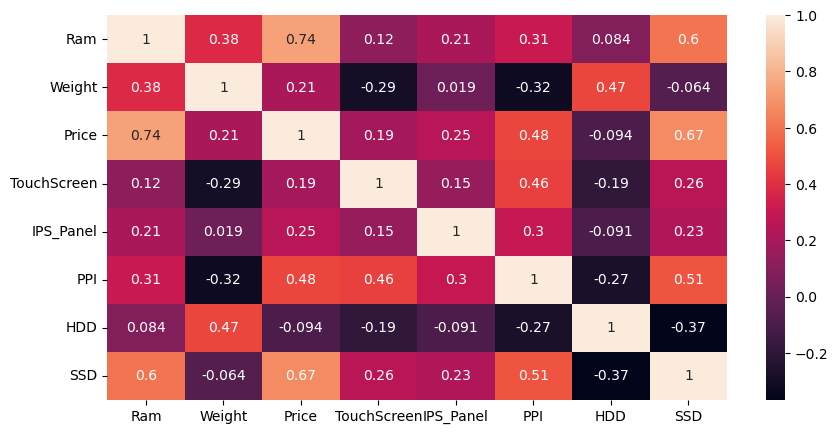

In [91]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

C:\Users\sati7\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

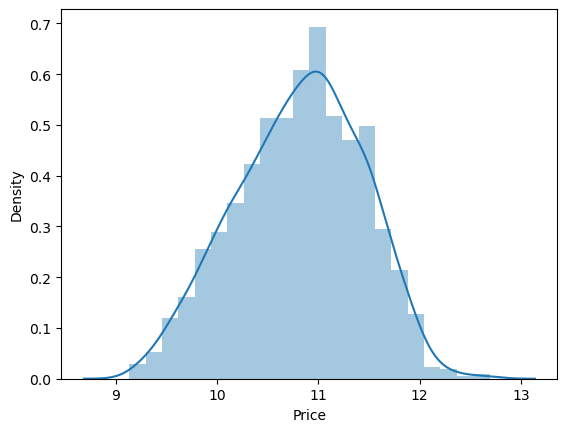

In [92]:
sns.distplot(np.log(data['Price']))

In [93]:
# SEPARATING INPUT AND OUTPUT COLUMNS.
x= data.drop(columns='Price')
y=np.log(data['Price'])

In [94]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test= train_test_split(x,y,test_size=0.10, random_state=21)

In [95]:
print(x.shape, x_train.shape, x_test.shape)

(1302, 12) (1171, 12) (131, 12)


In [96]:
print(y.shape, y_train.shape, y_test.shape)

(1302,) (1171,) (131,)


In [97]:
#MODEL TRAINING

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import * 

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [99]:
#LINEAR REGRESSION

In [100]:
step1=ColumnTransformer(transformers=[
    ('One_hot',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= LinearRegression()


pipe= Pipeline([
    ('step1', step1),
    ('step2',step2)
])



In [101]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', LinearRegression())])

In [102]:
#TESTIING ACCURACY
r2_score(y_test, pipe.predict(x_test))

0.8287567371859881

In [103]:
#TRAINING ACCURACY
r2_score(y_train, pipe.predict(x_train))

0.8302624543845107

In [104]:
#DECISION TREE

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8,min_samples_split=4,min_samples_leaf=4)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])





In [105]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2',
                 DecisionTreeRegressor(max_depth=8, min_samples_leaf=4,
                                       min_samples_split=4))])

In [106]:
#TESTIING ACCURACY
r2_score(y_test, pipe.predict(x_test))

0.8349361713081018

In [107]:
#TRAINING ACCURACY
r2_score(y_train, pipe.predict(x_train))

0.8931064496829411

In [108]:
#RANDOM FOREST REGRESSOR.
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=251,
                              random_state=2,
                              max_samples=0.7,
                              max_features=0.75,
                              max_depth=14)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [109]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2',
                 RandomForestRegressor(max_depth=14, max_features=0.75,
                                       max_samples=0.7, n_estimators=251,
                                       random_state=2))])

In [110]:
#TESTIING ACCURACY
r2_score(y_test, pipe.predict(x_test))

0.9003647676833627

In [111]:
#TRAINING ACCURACY
r2_score(y_train, pipe.predict(x_train))

0.9640399752495993

In [112]:
#DUMPING.

import pickle
pickle.dump(data.to_dict(),open('data.pkl','wb'))
pickle.dump(pipe, open('pipe.pkl','wb'))

In [113]:
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS_Panel,PPI,Cpu Brand,HDD,SSD,Gpu brand,Operating System
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other O/S
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
x_train

In [ ]:
data12.iloc[368,:]